# Statistiques descriptives 

## Modules utiles

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import sklearn.preprocessing 
from sklearn.preprocessing import scale 


c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
enedis_final=pd.read_csv("Données/enedis_final.csv")

In [88]:
enedis_final=enedis_final.loc[enedis_final["date"]<"2021-07-31"]

In [89]:
enedis_final

,horodate,region_x,code_region,total_energie_soutiree_wh,plage_de_puissance_souscrite,nb_points_soutirage,jour_max_du_mois_0_1,semaine_max_du_mois_0_1,profil,profil_type,...,"Part des ""cadres et professions intellectuelles supérieures"" dans la population 2018",Médiane du revenu disponible par UC 2018,Population au dernier recensement 2018,Part des 15-29 ans 2018,Part des 30-44 ans 2018,Part des 45-59 ans 2018,Part des 60-74 ans 2018,Part des 75 ans et plus 2018,Taux de chômage des 15 ans et plus (RP) 2018,tmoy
0,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,130666817.0,P2: ]3-6] kVA,1685439,0,0,RES1 (+ RES1WE),RES,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,16.48
1,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,436083.0,P8: ]24-30] kVA,901,0,0,RES11 (+ RES11WE),RES,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,16.48
2,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,2133213.0,P9: ]30-36] kVA,3839,0,0,RES11 (+ RES11WE),RES,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,16.48
3,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,104448854.0,P4: ]9-12] kVA,269648,0,0,RES2 (+ RES5),RES,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,16.48
4,2020-06-04T00:00:00+00:00,Auvergne-Rhône-Alpes,84,804838.0,P4: ]9-12] kVA,1830,0,0,RES2WE,RES,...,9.4,22480.0,7994459.0,17.6,18.8,19.8,16.2,9.4,11.4,16.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574686,2021-07-30T23:30:00+00:00,Bretagne,53,917985.0,P5: ]12-15] kVA,4741,0,0,RES11 (+ RES11WE),RES,...,7.6,21750.0,3335414.0,16.4,17.6,20.1,18.1,10.5,11.4,16.77
4574687,2021-07-30T23:30:00+00:00,Provence-Alpes-Côte d'Azur,93,1225526.0,P7: ]18-30] kVA,1234,0,0,RES3,RES,...,8.3,21350.0,5052832.0,16.1,17.9,20.1,18.0,11.1,14.0,24.61
4574688,2021-07-30T23:30:00+00:00,Provence-Alpes-Côte d'Azur,93,9615931.0,P7: ]18-24] kVA,9144,0,0,RES2 (+ RES5),RES,...,8.3,21350.0,5052832.0,16.1,17.9,20.1,18.0,11.1,14.0,24.61
4574689,2021-07-30T23:30:00+00:00,Occitanie,76,300264.0,P5: ]12-15] kVA,746,0,0,RES3,RES,...,8.4,20740.0,5885496.0,16.8,17.7,20.0,18.1,10.7,14.5,21.75


### Création de deux dataframes selon le profil de consommation :

Parmi les profils résidentiels, plusieurs sous-profils de consommation étaient présents. En étudiant le dictionnaire des variables associé, nous avons décidé de découper notre dataset en deux types de consommation pour réaliser les statistiques descriptives : 
 - les profils “haute consommation” dont la consommation est comprise entre 6kVA et 36kVA
 - les profils “basse consommation” dont la consommation est inférieure à 6kVA


* Basse consommation 

In [90]:
basse_conso=enedis_final[enedis_final["profil"]=="RES1 (+ RES1WE)"]

* Haute consommation 

In [91]:
haute_conso=enedis_final[enedis_final["profil"]=="RES11 (+ RES11WE)"]

## 1. Dynamique annuelle (consommation électrique et météo)

#### Statistiques sur les températures

* Variation de la température par jour par région 
  

In [82]:
def temp_day_region(df,region):
    res=enedis_final[enedis_final["region_x"]==region].groupby("date")["tmoy"].mean()
    plt.plot(res, label= region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Variation de la température par jour pour "+region,size=18)
    
    

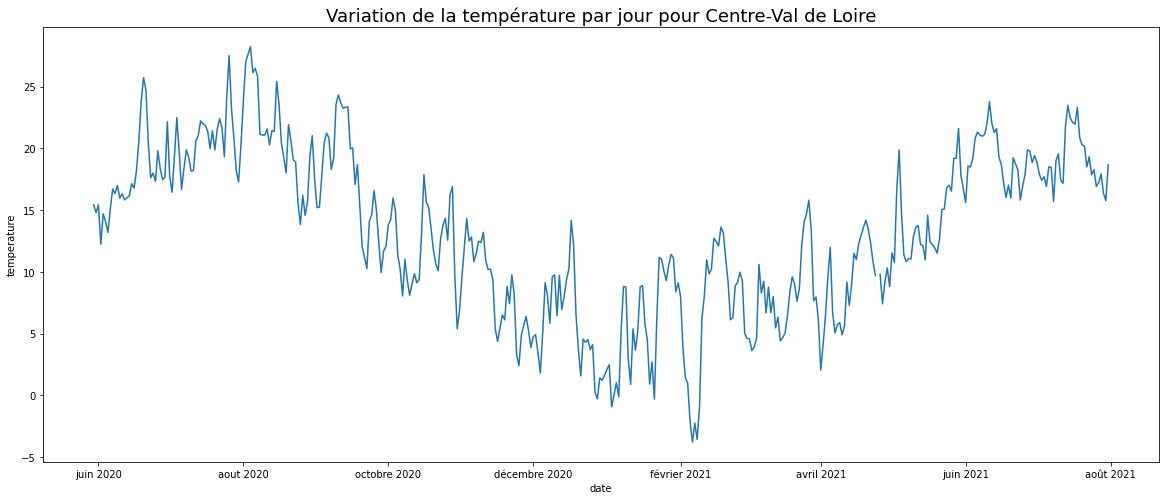

In [83]:
plt.figure(figsize=(20, 8))
temp_day_region(enedis_final,'Centre-Val de Loire')

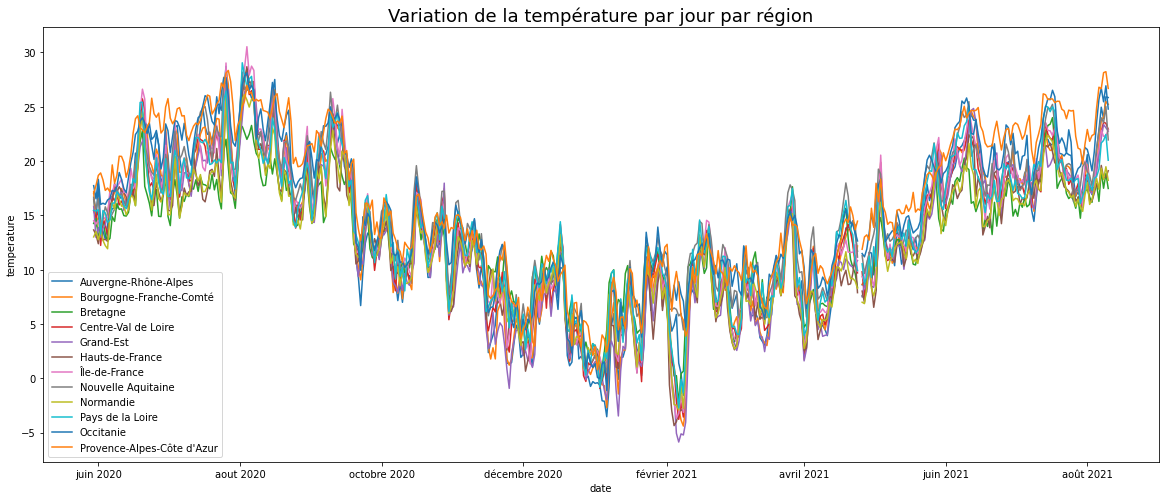

In [143]:
regions=list(enedis_final["region_x"].unique())

def temp_day_regions(df,regions):
    plt.figure(figsize=(20, 8))
    for region in regions:
        temp_day_region(enedis_final,region)
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.legend()
    plt.title("Variation de la température par jour par région",size=18)
    plt.show()

temp_day_regions(enedis_final,regions)

### Statistiques sur la consommation :

* Variation de la consommation électrique sur l'année pour la France 

In [92]:
def conso_day_france(df,type_conso):
    nb_total_menages=29047296

    res=df.groupby("date")["total_energie_soutiree_wh"].sum()
    res=res/nb_total_menages

    plt.figure(figsize=(20, 8))
    plt.grid(True)
    if type_conso=="haute conso":
        plt.plot(res,"c")
    else :
        plt.plot(res,"blue")
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06","2021-08-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021","août 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique par ménage sur 1 an pour la France, profil "+type_conso,size=18)
    plt.show
    

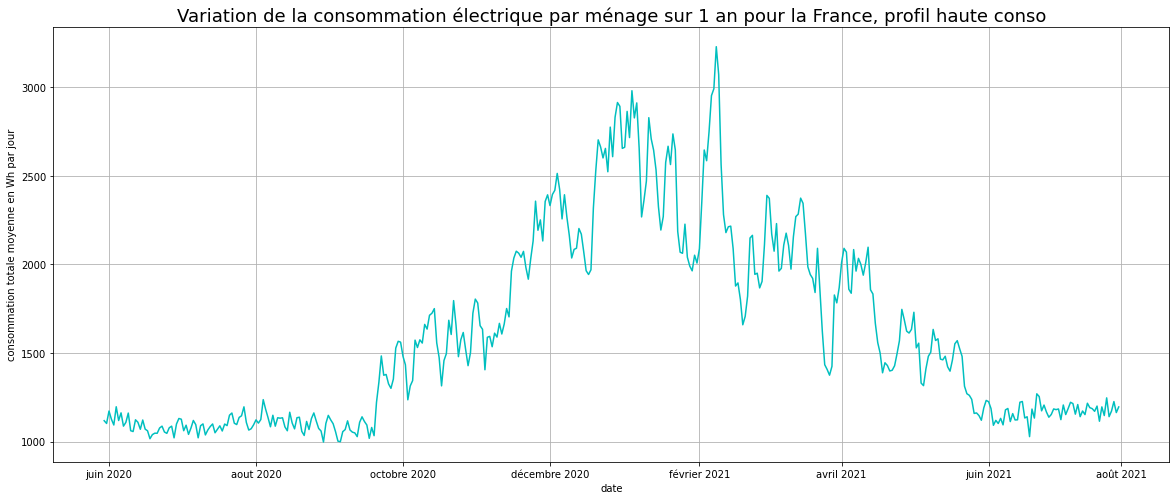

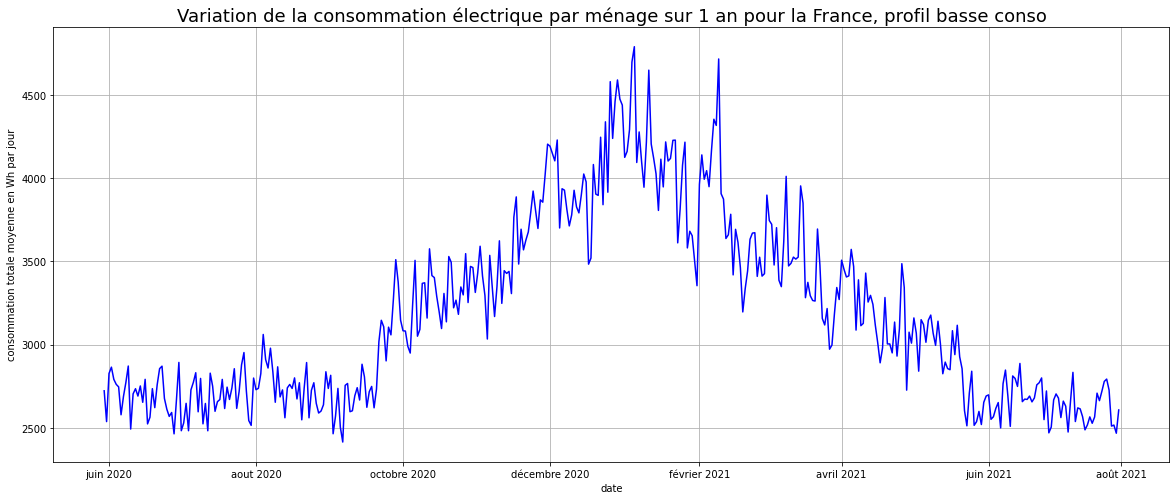

In [93]:

conso_day_france(haute_conso,'haute conso')

conso_day_france(basse_conso,'basse conso')

* Variation de la consommation électrique sur l'année par région

In [109]:
res=enedis_final[enedis_final["region_x"]=="Normandie"].groupby("date")["total_energie_soutiree_wh"].sum()

In [118]:
value=enedis_final[enedis_final["region_x"]=="Normandie"]["Ensemble"]

In [121]:
value.values[0]

1500834

In [122]:
def conso_day_reg(df,region,type_conso):
    res=df[df["region_x"]==region].groupby("date")["total_energie_soutiree_wh"].sum()
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"]
    nb_menage=menage.values[0]
    res=res/nb_menage

    menage
    plt.figure(figsize=(20, 8))
    plt.grid(True)
    if type_conso=="haute conso":
        plt.plot(res,"c")
    else :
        plt.plot(res,"blue")
    t2=["2020-06-06","2020-08-06","2020-10-06","2020-12-06","2021-02-06","2021-04-06","2021-06-06"]
    plt.xticks(t2,["juin 2020","aout 2020","octobre 2020","décembre 2020","février 2021","avril 2021","juin 2021"])
    plt.xlabel('date')
    plt.ylabel('consommation totale moyenne en Wh par jour')
    plt.title("Variation de la consommation électrique moyenne par ménage sur 1 an pour "+region+" profil "+type_conso,size=18)
    plt.show
    

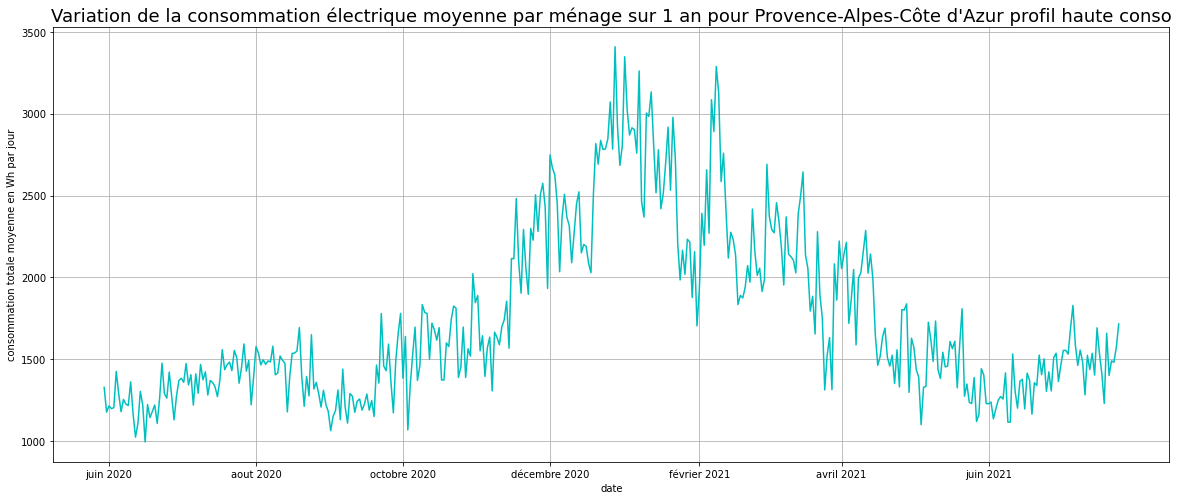

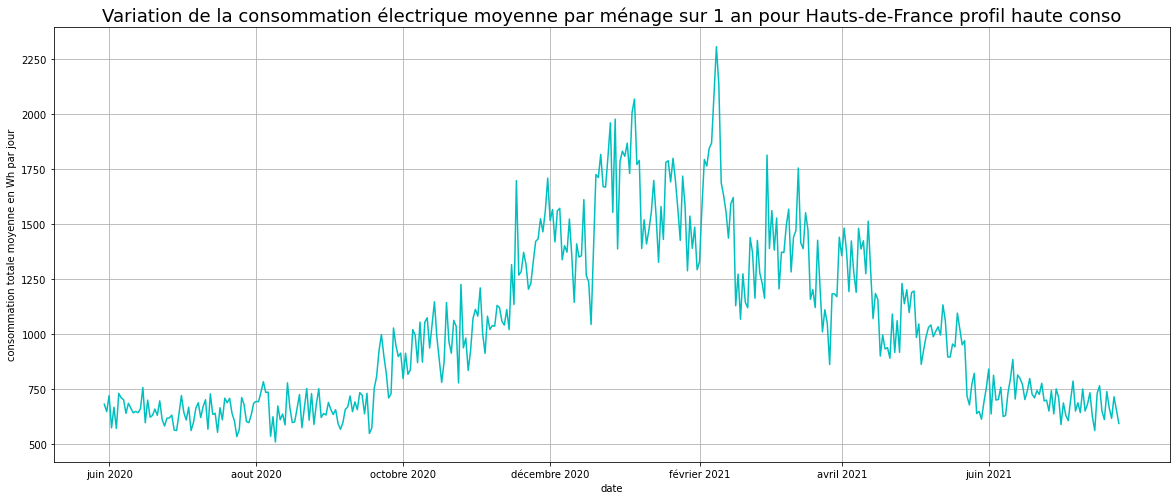

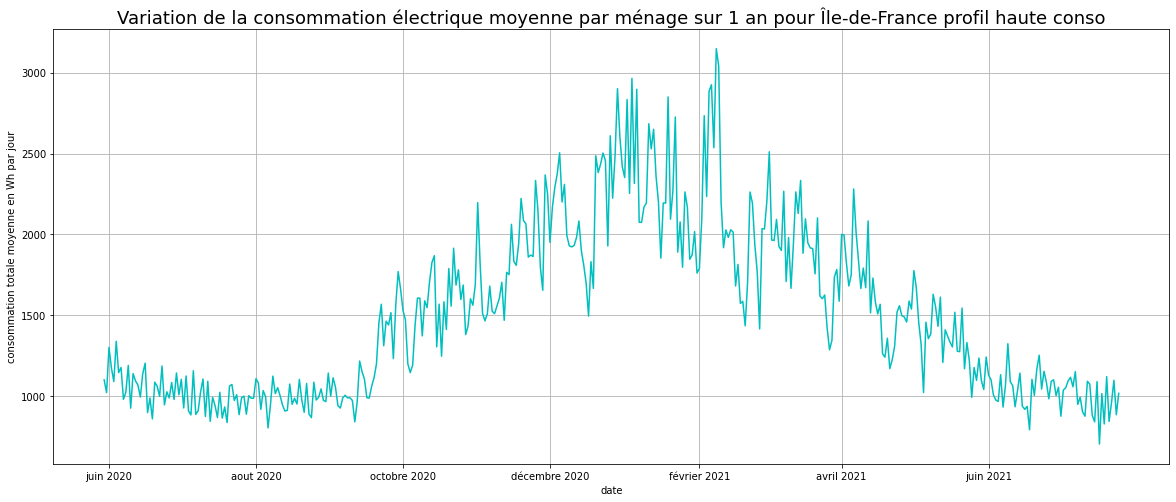

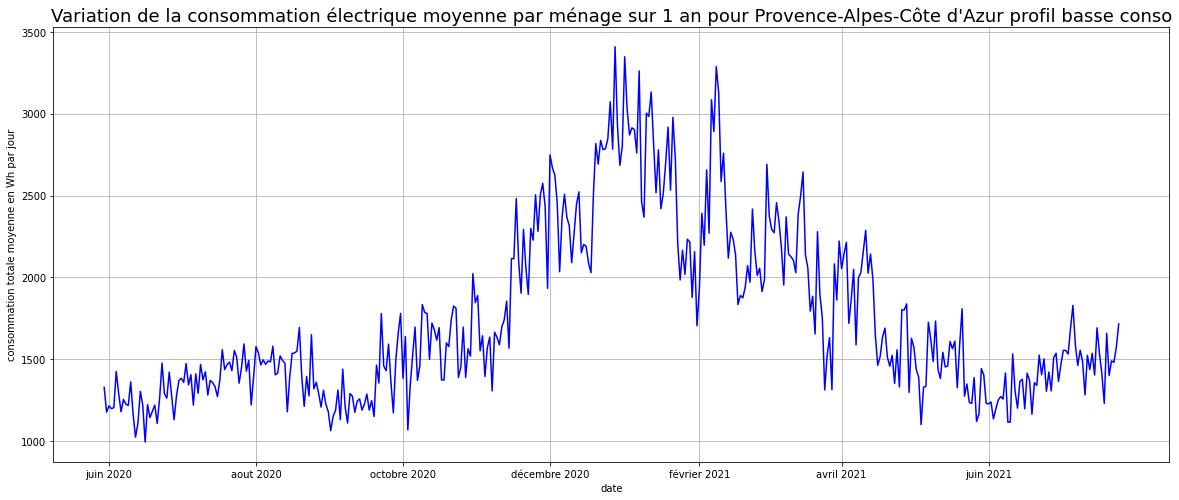

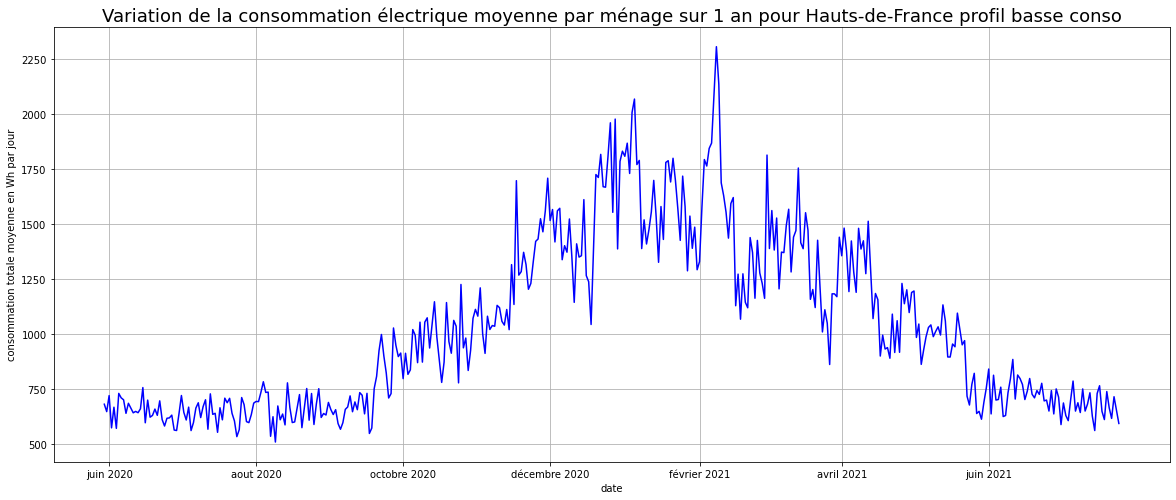

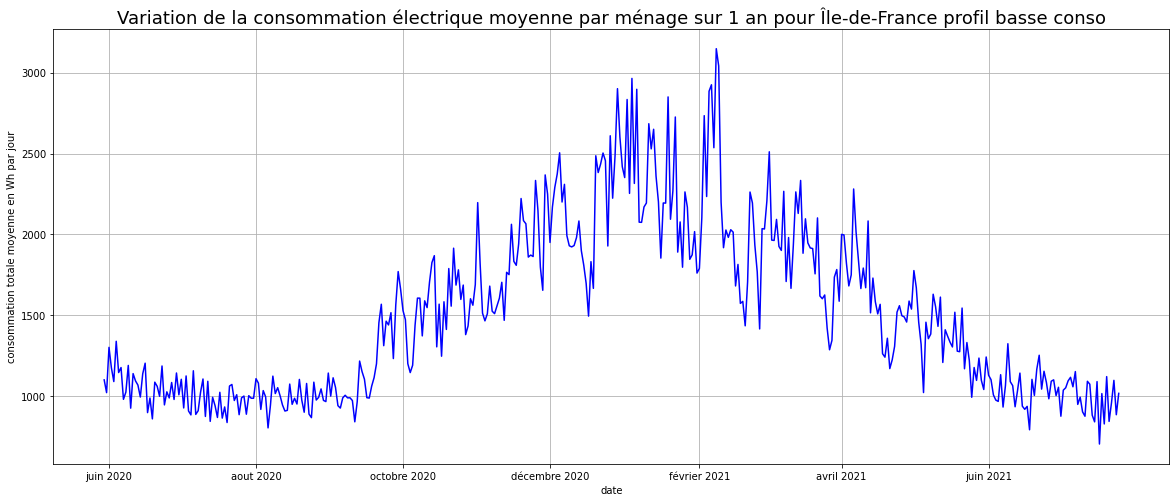

In [123]:
conso_day_reg(haute_conso,"Provence-Alpes-Côte d'Azur","haute conso")
conso_day_reg(haute_conso,'Hauts-de-France',"haute conso")
conso_day_reg(haute_conso,'Île-de-France',"haute conso")

conso_day_reg(haute_conso,"Provence-Alpes-Côte d'Azur","basse conso")
conso_day_reg(haute_conso,'Hauts-de-France',"basse conso")
conso_day_reg(haute_conso,'Île-de-France',"basse conso")

* Corrélation température/consommation électrique, par région 

In [126]:
def corr_total_energie_temperature(df,region,type_conso):
    plt.figure(figsize=(20, 8))
    plt.ylabel("total moyen d'énergie soutirée par jour (Wh)")
    plt.xlabel('temperature')
    plt.legend()
    plt.title("Corrélation entre température moyenne et totale myoen d'énergie moyenne soutirée par ménage et par jour pour "+region+" "+type_conso,size=18)

    X1=df[df["region_x"]==region].groupby("date")["tmoy"].mean() # moyenne des températures par jour
    X2=df[df["region_x"]==region].groupby("date")["total_energie_soutiree_wh"].sum() # moyenne énergie soutirée par jour 
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"]
    nb_menage=menage.values[0]
    X2=X2/nb_menage

    if type_conso=="haute conso":
        plt.plot(X1,X2,"oc")
    else:
        plt.plot(X1,X2,"ob")
    plt.show()
    correlation=X1.corr(X2)
    print("La corrélation est de " +str(correlation))
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


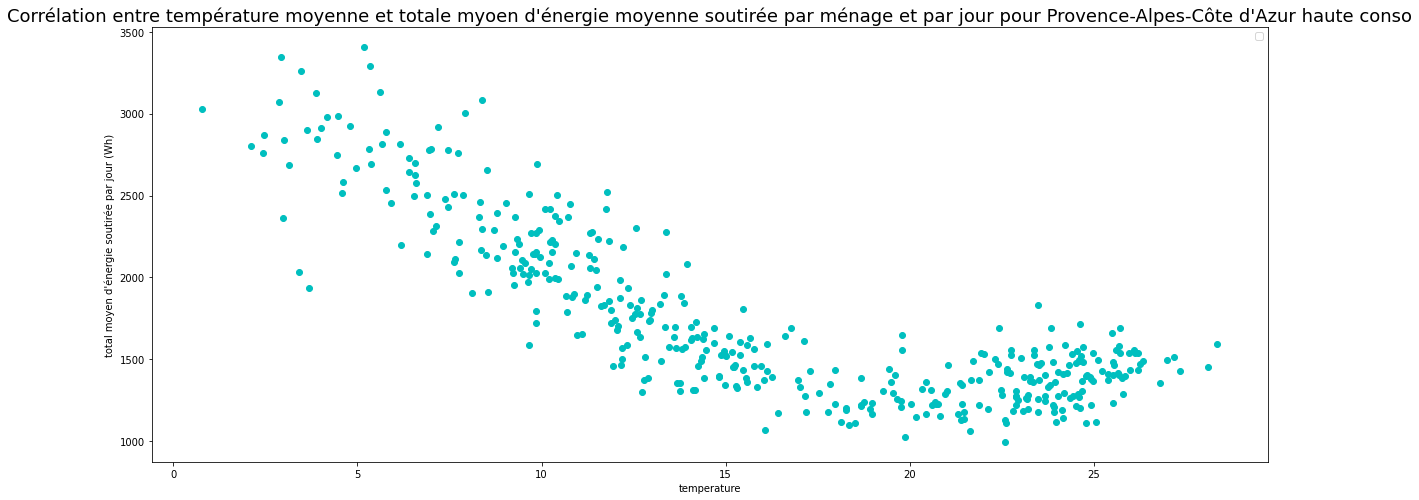

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.8164247527214283


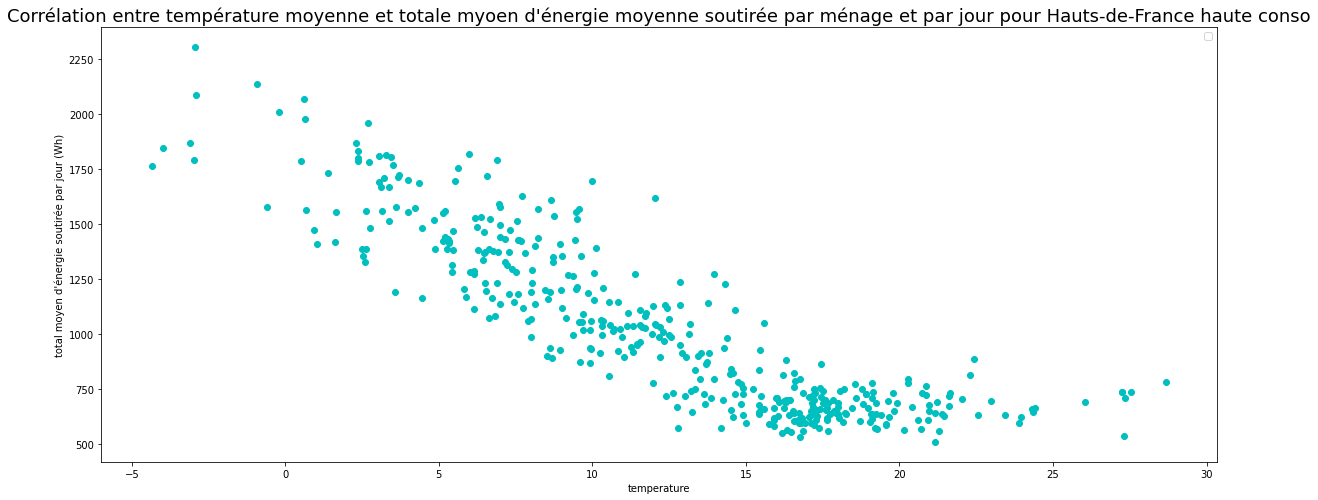

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.8797012732603198


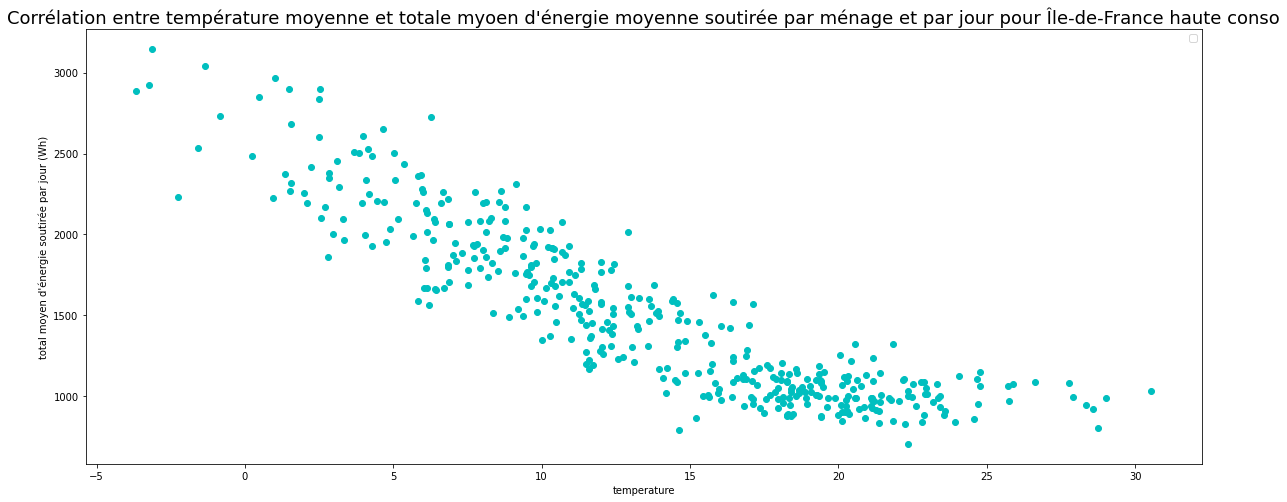

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.8977198591665576


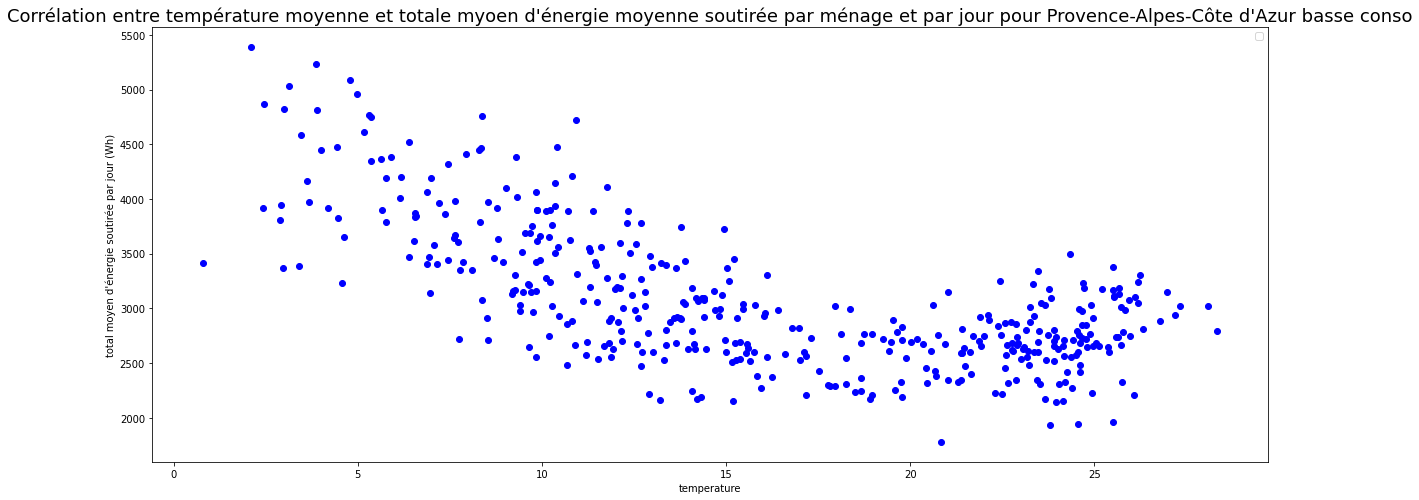

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.6684519072084566


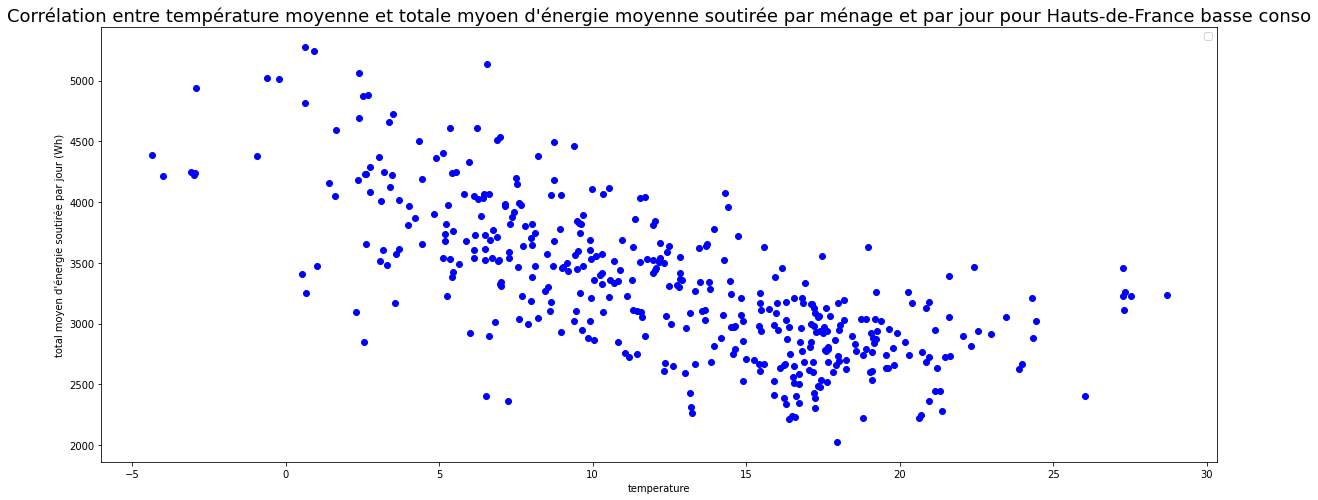

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


La corrélation est de -0.709433249777506


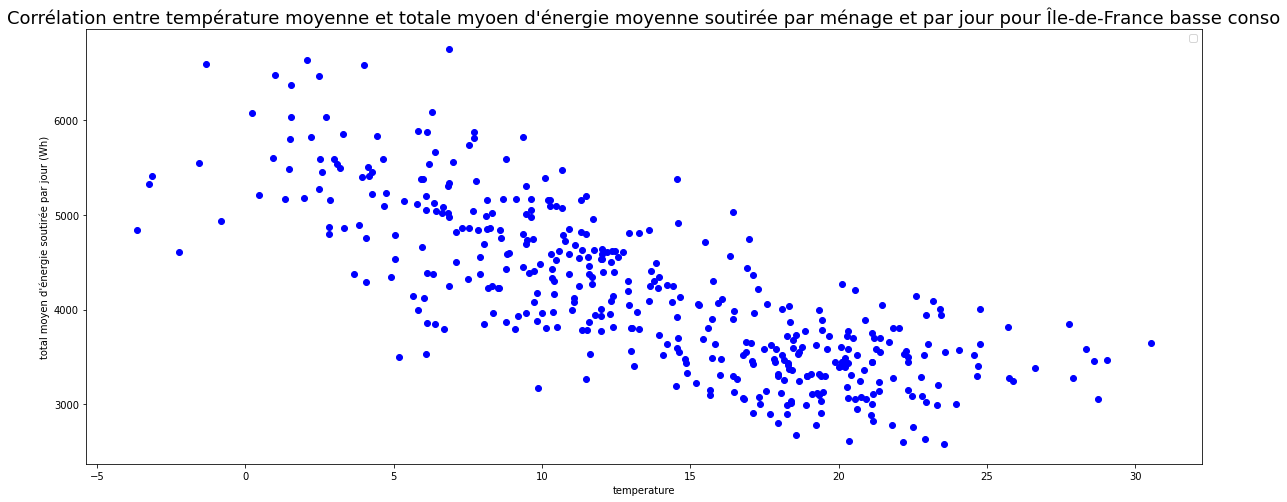

La corrélation est de -0.7835390786626563


In [127]:
# Les points correspondent à un jour : donc il y a plus de 365 points
#pour PACA, plus d'énergie soutirée en été à partir de 25 degrés que pour d'autres régions (effet clim) (600kW)

corr_total_energie_temperature(haute_conso,"Provence-Alpes-Côte d'Azur","haute conso")
corr_total_energie_temperature(haute_conso,"Hauts-de-France","haute conso")
corr_total_energie_temperature(haute_conso,"Île-de-France","haute conso")


corr_total_energie_temperature(basse_conso,"Provence-Alpes-Côte d'Azur","basse conso")
corr_total_energie_temperature(basse_conso,"Hauts-de-France","basse conso")
corr_total_energie_temperature(basse_conso,"Île-de-France","basse conso")


## 2. Dynamique saisonnière 

### Données pour haute conso : 

In [149]:
haute_conso["mois"]=haute_conso["date"].apply(lambda x : x[5:7])


C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1881582847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haute_conso["mois"]=haute_conso["date"].apply(lambda x : x[5:7])


In [150]:
ete=haute_conso[(haute_conso["mois"]=="06")|(haute_conso["mois"]=="07")|(haute_conso["mois"]=="08")]

automne=haute_conso[(haute_conso["mois"]=="09")|(haute_conso["mois"]=="10")|(haute_conso["mois"]=="11")]

hiver=haute_conso[(haute_conso["mois"]=="12")|(haute_conso["mois"]=="01")|(haute_conso["mois"]=="02")]

printemps=haute_conso[(haute_conso["mois"]=="03")|(haute_conso["mois"]=="04")|(haute_conso["mois"]=="05")]

### Données pour basse conso :

In [151]:
basse_conso["mois"]=basse_conso["date"].apply(lambda x : x[5:7])

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/3728763804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basse_conso["mois"]=basse_conso["date"].apply(lambda x : x[5:7])


In [152]:
ete_basse=basse_conso[(basse_conso["mois"]=="06")|(basse_conso["mois"]=="07")|(basse_conso["mois"]=="08")]

automne_basse=basse_conso[(basse_conso["mois"]=="09")|(basse_conso["mois"]=="10")|(basse_conso["mois"]=="11")]

hiver_basse=basse_conso[(basse_conso["mois"]=="12")|(basse_conso["mois"]=="01")|(basse_conso["mois"]=="02")]

printemps_basse=basse_conso[(basse_conso["mois"]=="03")|(basse_conso["mois"]=="04")|(basse_conso["mois"]=="05")]

### Données pour les quantiles :


In [153]:
haute_conso.total_energie_soutiree_wh.describe()
# Premier quantile de conso = 1.269489e+06
# Troisième quantile de conso = 2.349043e+07 


count    9.739970e+05
mean     2.025719e+07
std      3.560330e+07
min      6.020000e+04
25%      1.305879e+06
50%      4.414456e+06
75%      2.373315e+07
max      3.941065e+08
Name: total_energie_soutiree_wh, dtype: float64

In [154]:
haute_conso_Q1=haute_conso[haute_conso.total_energie_soutiree_wh<=1.269489e+06]
haute_conso_Q3=haute_conso[haute_conso.total_energie_soutiree_wh<=2.349043e+07]

In [155]:

ete_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="06")|(haute_conso_Q1["mois"]=="07")|(haute_conso_Q1["mois"]=="08")]

automne_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="09")|(haute_conso_Q1["mois"]=="10")|(haute_conso_Q1["mois"]=="11")]

hiver_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="12")|(haute_conso_Q1["mois"]=="01")|(haute_conso_Q1["mois"]=="02")]

printemps_Q1=haute_conso_Q1[(haute_conso_Q1["mois"]=="03")|(haute_conso_Q1["mois"]=="04")|(haute_conso_Q1["mois"]=="05")]


In [156]:

ete_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="06")|(haute_conso_Q3["mois"]=="07")|(haute_conso_Q3["mois"]=="08")]

automne_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="09")|(haute_conso_Q3["mois"]=="10")|(haute_conso_Q3["mois"]=="11")]

hiver_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="12")|(haute_conso_Q3["mois"]=="01")|(haute_conso_Q3["mois"]=="02")]

printemps_Q3=haute_conso_Q3[(haute_conso_Q3["mois"]=="03")|(haute_conso_Q3["mois"]=="04")|(haute_conso_Q3["mois"]=="05")]

In [215]:
conso_saison_region=ete[ete["region_x"]=="Normandie"]

conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

total_conso_saison_region=conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].sum()

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/2870174980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])


In [216]:
total_conso_saison_region

heure
00:00    3.011865e+09
00:30    2.739514e+09
01:00    2.797555e+09
01:30    2.883681e+09
02:00    2.718654e+09
02:30    2.698339e+09
03:00    2.933731e+09
03:30    3.027685e+09
04:00    3.233742e+09
04:30    3.354733e+09
05:00    4.119915e+09
05:30    4.234936e+09
06:00    4.748336e+09
06:30    4.822633e+09
07:00    5.376772e+09
07:30    5.679040e+09
08:00    5.517071e+09
08:30    5.897357e+09
09:00    5.360339e+09
09:30    5.317776e+09
10:00    6.357567e+09
10:30    6.422676e+09
11:00    6.398394e+09
11:30    5.577614e+09
12:00    5.594656e+09
12:30    5.344088e+09
13:00    5.449073e+09
13:30    4.923241e+09
14:00    5.077682e+09
14:30    4.458989e+09
15:00    4.903066e+09
15:30    4.984912e+09
16:00    4.735102e+09
16:30    5.563317e+09
17:00    5.819981e+09
17:30    6.325118e+09
18:00    5.962576e+09
18:30    5.516557e+09
19:00    5.227057e+09
19:30    5.354958e+09
20:00    5.561948e+09
20:30    4.650409e+09
21:00    4.229043e+09
21:30    4.048997e+09
22:00    3.544071e+09
22:3

In [219]:
conso_saison_region=printemps[printemps["region_x"]=='Normandie']

conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

total_conso_saison_region=conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].sum()

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/3312717466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])


In [220]:
total_conso_saison_region

heure
00:00    3.446224e+09
00:30    3.895352e+09
01:00    3.577283e+09
01:30    3.535719e+09
02:00    3.540680e+09
02:30    3.969820e+09
03:00    4.015278e+09
03:30    4.104120e+09
04:00    3.902733e+09
04:30    4.312125e+09
05:00    5.241762e+09
05:30    5.432715e+09
06:00    5.795811e+09
06:30    6.249951e+09
07:00    6.344178e+09
07:30    6.559379e+09
08:00    6.108478e+09
08:30    6.642775e+09
09:00    5.176282e+09
09:30    5.648294e+09
10:00    6.308511e+09
10:30    6.299460e+09
11:00    6.398765e+09
11:30    5.457964e+09
12:00    5.688876e+09
12:30    5.785290e+09
13:00    5.139058e+09
13:30    4.954480e+09
14:00    4.918833e+09
14:30    4.356635e+09
15:00    4.278601e+09
15:30    4.755658e+09
16:00    4.905021e+09
16:30    5.254292e+09
17:00    5.827614e+09
17:30    6.732260e+09
18:00    6.674545e+09
18:30    6.360304e+09
19:00    6.179940e+09
19:30    6.070598e+09
20:00    5.613362e+09
20:30    4.940561e+09
21:00    5.153327e+09
21:30    4.434540e+09
22:00    4.159756e+09
22:3

In [221]:
# molaire conso moyenne par heure pour chaque jour de la saison
def molaire_saison(data_saison,region,saison,color):
    conso_saison_region=data_saison[data_saison["region_x"]==region]

    conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])

    total_conso_saison_region=conso_saison_region.groupby("heure")["total_energie_soutiree_wh"].sum()
    menage=enedis_final[enedis_final["region_x"]==region]["Ensemble"]
    nb_menage=menage.values[0]
    #total_conso_saison_region=total_conso_saison_region/nb_menage

    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    plt.plot(total_conso_saison_region,color,label=saison)
    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"]
    plt.xticks(t2,["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:00"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation d'énergie")
    plt.title('Molaire pour la saison '+saison+", région "+region,size=25)
   

haute=[ete,automne,hiver,printemps]
basse=[ete_basse,automne_basse,hiver_basse,printemps_basse]

def molaire_toute_saison(region,type_conso):
    plt.figure(figsize=(20, 8))
    axes = plt.gca()
    axes.set_xlim("00:00","00:00")
    
    if type_conso=="basse conso":
        molaire_saison(ete_basse,region,"été","orangered")
        molaire_saison(automne_basse,region,"automne","brown")
        molaire_saison(hiver_basse,region,"hiver","c")
        molaire_saison(printemps_basse,region,"printemps","green")

    elif type_conso=="haute conso":
        molaire_saison(ete,region,"été","orangered")
        molaire_saison(automne,region,"automne","brown")
        molaire_saison(hiver,region,"hiver","c")
        molaire_saison(printemps,region,"printemps","green")

        

    elif type_conso=="haute conso Q1 Q3":
        molaire_saison(ete_Q1,region,"été_Q1","orangered")
        molaire_saison(automne_Q1,region,"automne_Q1","peru")
        molaire_saison(hiver_Q1,region,"hiver_Q1","royalblue")
        molaire_saison(printemps_Q1,region,"printemps_Q1","yellowgreen")

        molaire_saison(ete_Q3,region,"été_Q3","orangered")
        molaire_saison(automne_Q3,region,"automne_Q3","brown")
        molaire_saison(hiver_Q3,region,"hiver_Q3","c")
        molaire_saison(printemps_Q3,region,"printemps_Q3","green")
    
    else :
        molaire_saison(ete_Q3,region,"été","orangered")
        molaire_saison(automne_Q3,region,"automne","brown")
        molaire_saison(hiver_Q3,region,"hiver","c")
        molaire_saison(printemps_Q3,region,"printemps","green")
    

    t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
    plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
    plt.xlabel('Heure')
    plt.ylabel("Consommation totale moyenne d'énergie par ménage")
    plt.legend()
    plt.title('Molaire par saison pour la région '+region+" pour "+type_conso,size=25)
   
    plt.show()
   

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

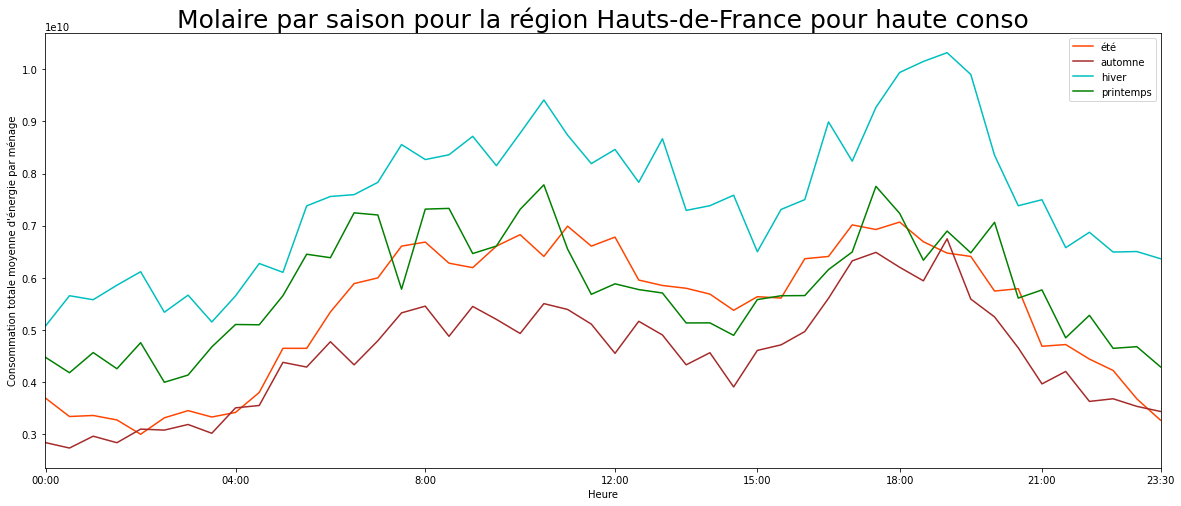

In [222]:
molaire_toute_saison("Hauts-de-France","haute conso")

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

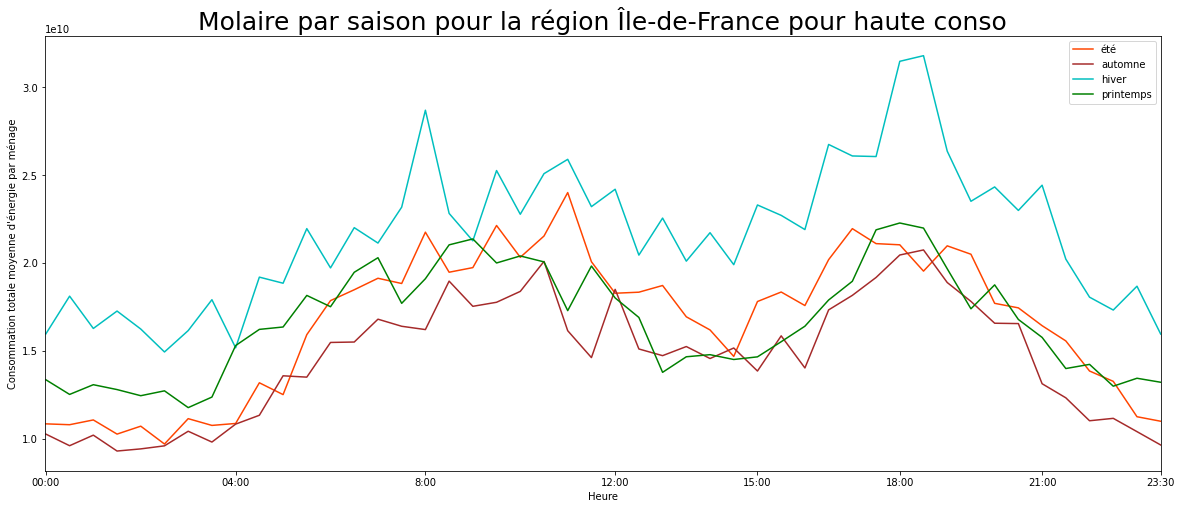

In [223]:
molaire_toute_saison("Île-de-France","haute conso")

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

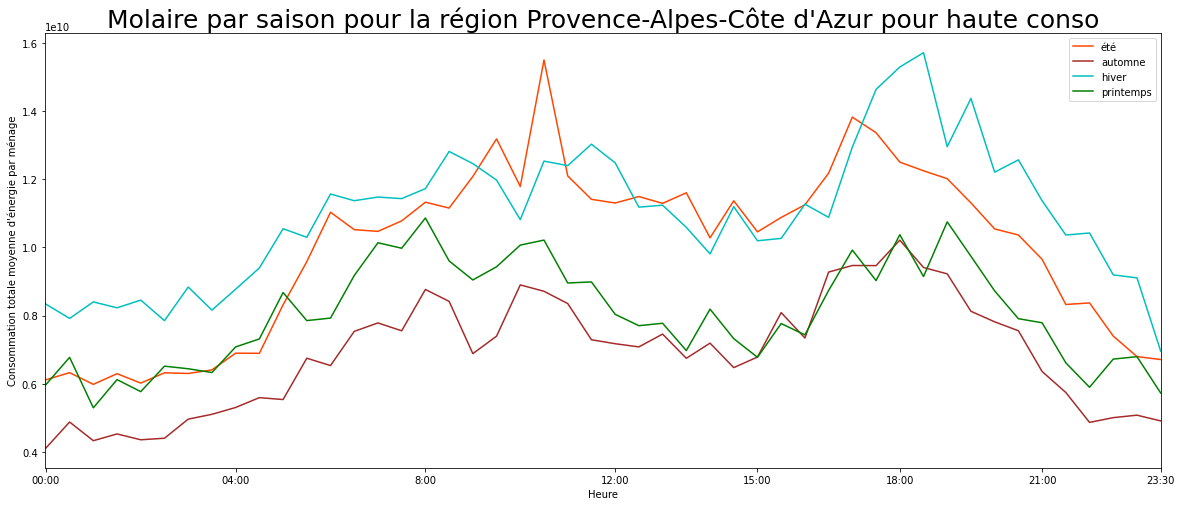

In [224]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","haute conso")

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

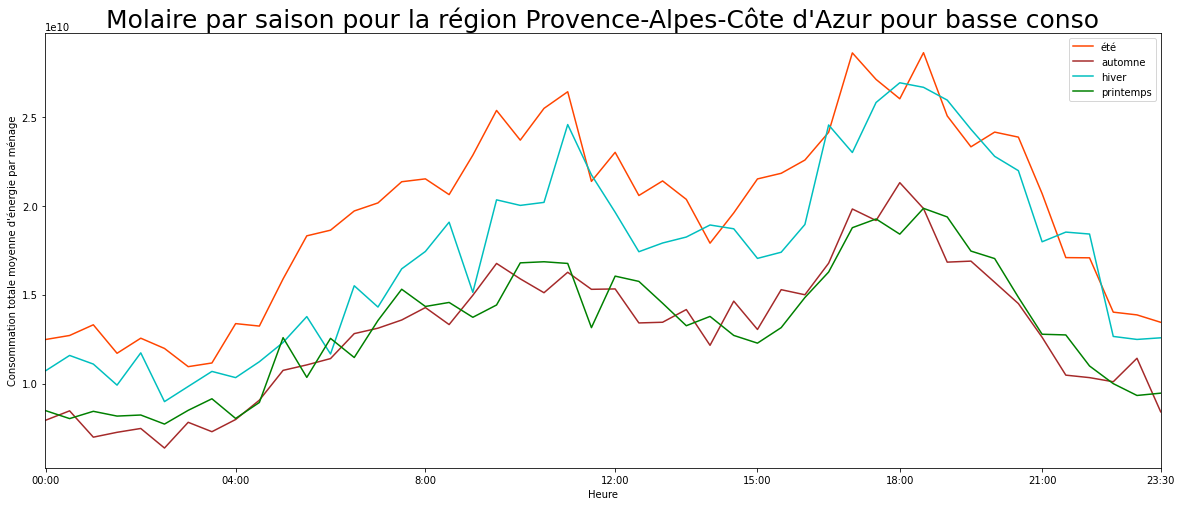

In [202]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","basse conso")

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

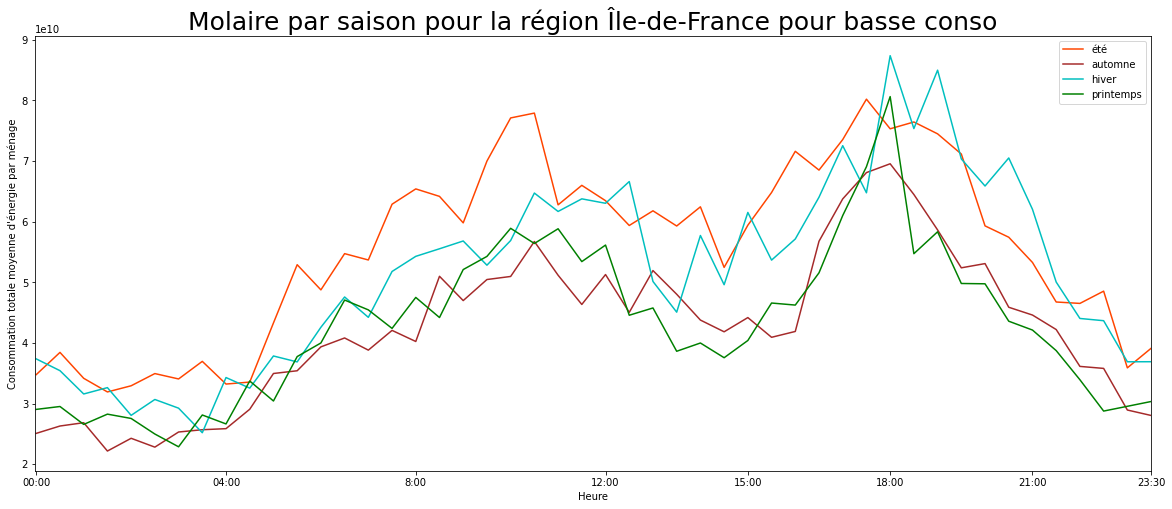

In [208]:
molaire_toute_saison("Île-de-France","basse conso")

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

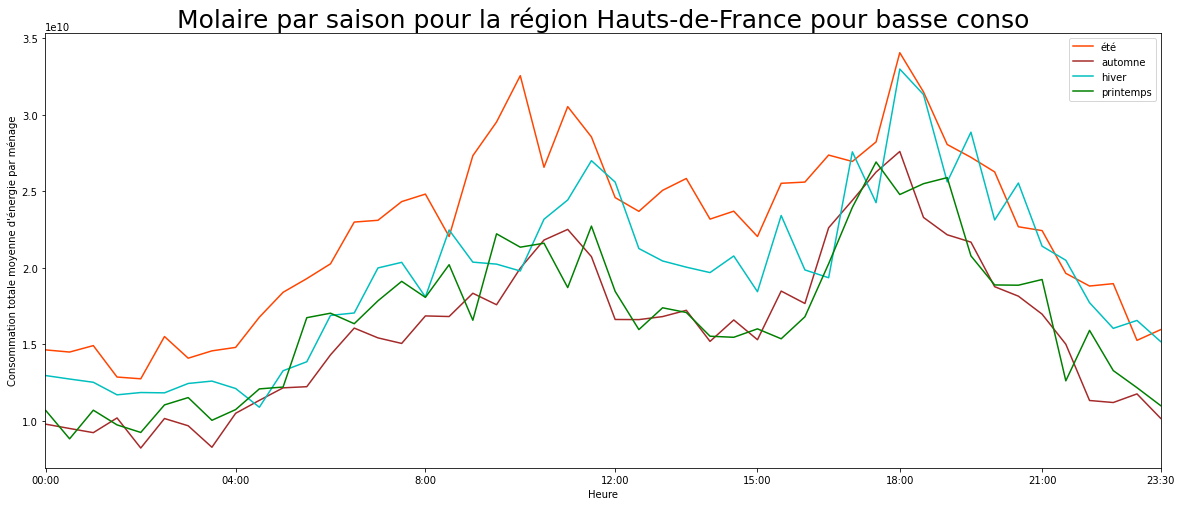

In [204]:
molaire_toute_saison("Hauts-de-France","basse conso")

### Molaires par quantile :

C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:28: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:13: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_16064/1183242772.py:5: SettingWithCopyWarning: 
A value is 

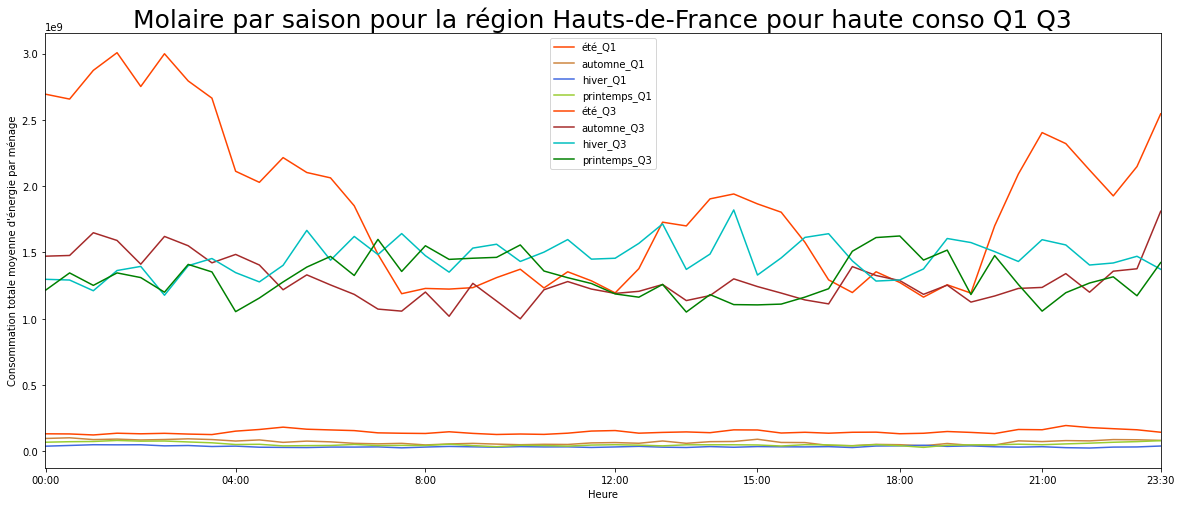

In [209]:
molaire_toute_saison("Hauts-de-France","haute conso Q1 Q3")

C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:24: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:9: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:5: SettingWithCopyWarning: 
A value is t

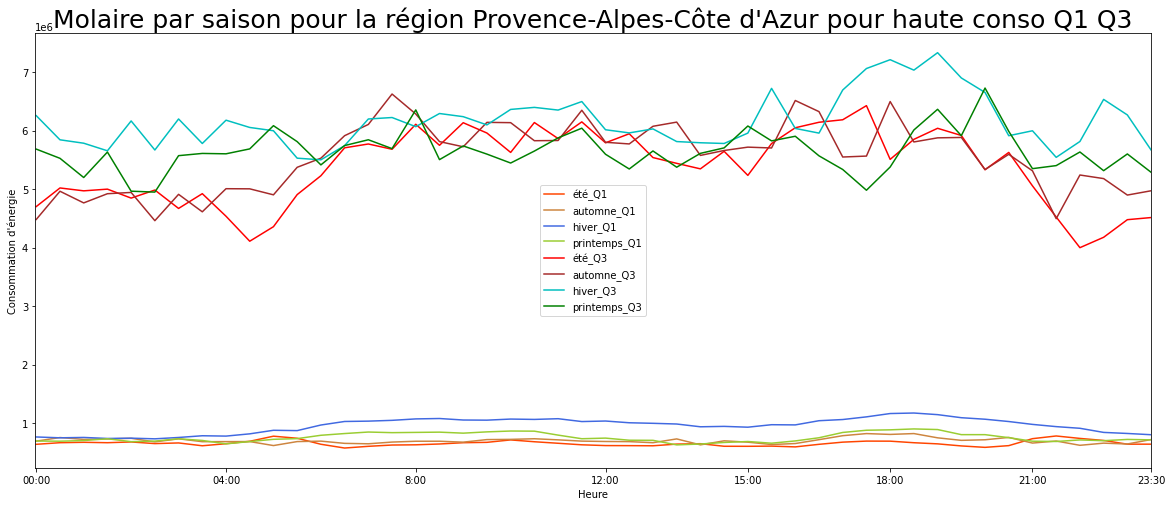

C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:24: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_saison_region["heure"]=conso_saison_region["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:9: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/3574247413.py:5: SettingWithCopyWarning: 
A value is t

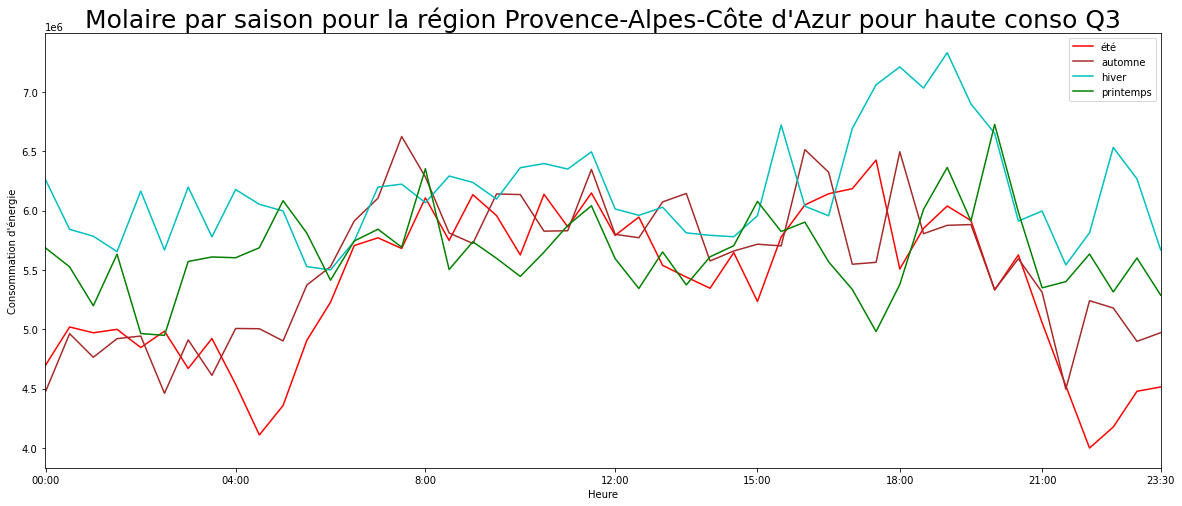

In [166]:
molaire_toute_saison("Provence-Alpes-Côte d'Azur","haute conso Q1 Q3")
molaire_toute_saison("Provence-Alpes-Côte d'Azur","haute conso Q3")

## Dynamique journalière 

C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/1635609140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haute_conso_30_09_2020["heure"]=haute_conso_30_09_2020["horodate"].apply(lambda x : x[11:16])
C:\Users\elelo\AppData\Local\Temp/ipykernel_11036/1635609140.py:8: UserWarning: Attempting to set identical left == right == [0.] results in singular transformations; automatically expanding.
  axes.set_xlim("00:00","00:00")


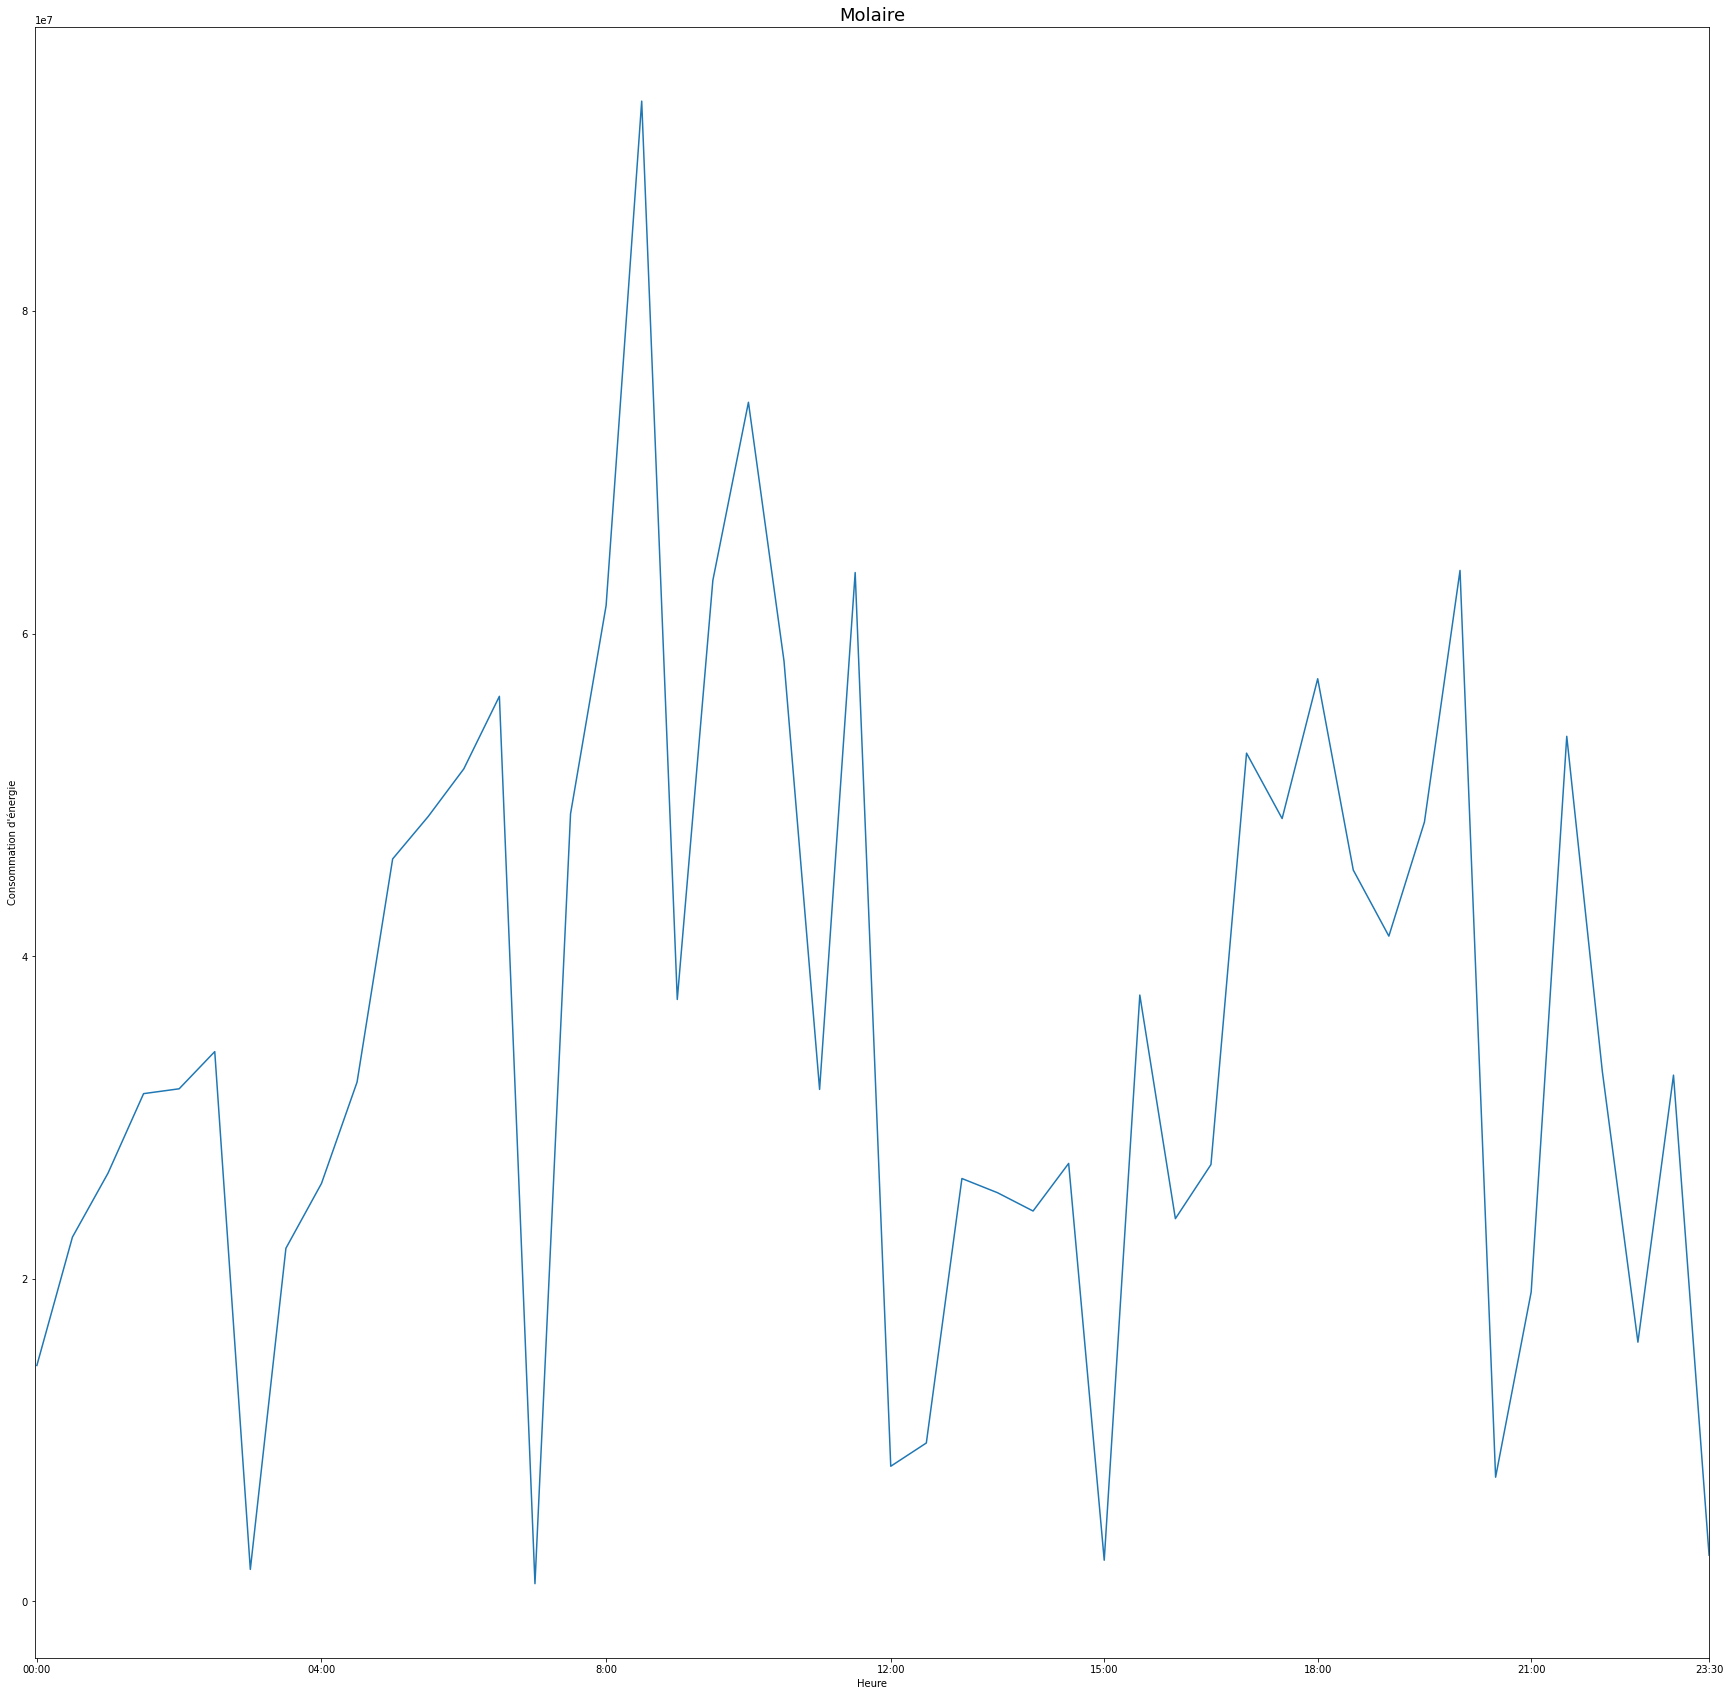

In [169]:
haute_conso_idf=haute_conso[haute_conso["region_x"]=="Île-de-France"]
haute_conso_30_09_2020 = haute_conso_idf[haute_conso_idf["date"]=="2020-09-30"]
haute_conso_30_09_2020["heure"]=haute_conso_30_09_2020["horodate"].apply(lambda x : x[11:16])
total_haute_conso_30_09_2020=haute_conso_30_09_2020.groupby("heure")["total_energie_soutiree_wh"].mean().reset_index()

plt.figure(figsize=(30, 30))
axes = plt.gca()
axes.set_xlim("00:00","00:00")
plt.plot(total_haute_conso_30_09_2020["heure"],total_haute_conso_30_09_2020["total_energie_soutiree_wh"] )
t2=["00:00","04:00","08:00","12:00","15:00","18:00","21:00","23:30"]
plt.xticks(t2,["00:00","04:00","8:00","12:00","15:00","18:00","21:00","23:30"])
plt.xlabel('Heure')

plt.ylabel("Consommation d'énergie")
plt.title('Molaire',size=18)
plt.show()
